In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

/Users/rosclay/Documents/VSCode/langgraph-multi-agent/venv/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `bind_tools` is in beta. It is actively being worked on, so the API may change.
  warn_beta(
Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Walks - {today}"

In [4]:
session_id = '17339'

In [5]:
task = "plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season."
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Retrieve'}}
----
Distance to neareast plan: 0.39248859882354736
{'Retrieve': {'next': 'Modify', 'nearest_plan': "1. Import the necessary libraries:\n\n```python\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport matplotlib.pyplot as plt\n```\n\n2. Look up Danny Duffy's player ID:\n\n```python\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'][0]  \n```\n\n3. Get Danny Duffy's statcast pitching data for the 2018 season:\n\n```python\nduffy_2018 = statcast_pitcher('2018-03-29', '2018-10-01', duffy_id)\n```\n\n4. Sum the strikeouts per game, skipping NaN values:\n\n```python\nduffy_2018['strikeouts'] = duffy_2018['events'].str.contains('strikeout', na=False).astype(int)\nstrikeouts_by_game = duffy_2018.groupby('game_date')['strikeouts'].sum()\n```\n\n5. Calculate the cumulative sum of strikeouts:\n\n```python \nstrikeouts_by_game_cumsum = strikeouts_by_game.cumsum()\n```\n\n6. Plot the results:\n\n```python\nplt.figure(figsize=(10,6))\nplt.

In [6]:
task = "include only 5 labels on the x axis"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season.', name='User'), AIMessage(content="1. Import the necessary libraries:\n\n```python\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport matplotlib.pyplot as plt\n```\n\n2. Look up Shane Bieber's player ID:\n\n```python\nbieber_id = playerid_lookup('bieber', 'shane')['key_mlbam'][0]\n```\n\n3. Get Shane Bieber's statcast pitching data for the 2020 season:\n\n```python\nbieber_2020 = statcast_pitcher('2020-07-23', '2020-09-27', bieber_id)\n```\n\n4. Sum the walks per game, skipping NaN values:\n\n```python\nbieber_2020['walks'] = bieber_2020['events'].str.contains('walk', na=False).astype(int)\nwalks_by_game = bieber_2020.groupby('game_date')['walks'].sum()\n```\n\n5. Calculate the cumulative sum of walks:\n\n```python\nwalks_by_game_cumsum = walks_by_game.cumsum()\n```\n\n6. Plot the results:\n\n```python\n

{'Orchestrate': {'next': 'Execute'}}
----
Executing: from pybaseball import playerid_lookup

# Look up Shane Bieber's player ID 
bieber_id = playerid_lookup('bieber', 'shane')['key_mlbam'][0]
print(f"Shane Bieber's player ID is: {bieber_id}")
Result: Gathering player lookup table. This may take a moment.
Shane Bieber's player ID is: 669456

Executing: from pybaseball import statcast_pitcher

# Get Shane Bieber's statcast pitching data for the 2020 season
bieber_2020 = statcast_pitcher('2020-07-23', '2020-09-27', bieber_id)

print(f"Retrieved {len(bieber_2020)} rows of data for Shane Bieber's 2020 season")
Result: Gathering Player Data
Retrieved 1238 rows of data for Shane Bieber's 2020 season

Executing: # Check for NaN values in the 'events' column
print(f"Number of NaN values in 'events' column: {bieber_2020['events'].isnull().sum()}")

# Create a 'walks' column that is 1 if the event is a walk, 0 otherwise. 
# Skip NaN values in 'events' to avoid errors
bieber_2020['walks'] = bieber

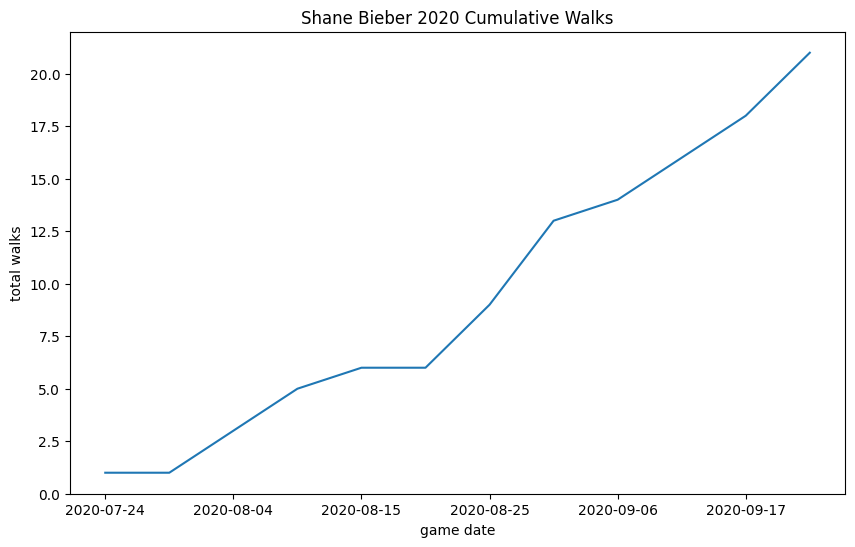

Result: The plot shows Shane Bieber's cumulative walks over the course of the 2020 season. The x-axis shows the game dates and the y-axis shows his total walks at that point in the season. By the end of the season, Bieber had accumulated 21 walks.

{'Execute': {'messages': [AIMessage(content='To plot the cumulative walks for Shane Bieber in the 2020 season:\n\n1. I imported the necessary libraries: pybaseball for the data and matplotlib for plotting. \n\n2. I looked up Shane Bieber\'s player ID using playerid_lookup().\n\n3. I retrieved Bieber\'s pitching statcast data for the 2020 season using statcast_pitcher().\n\n4. I summed the walks for each game, skipping NaN values, by creating a \'walks\' column and grouping by game_date.\n\n5. I calculated the cumulative sum of the walks over the course of the season.\n\n6. Finally, I plotted the cumulative walks vs the game date, with 5 x-tick labels across the season.\n\nThe final plot shows Bieber\'s cumulative walk total increasing from 0

In [7]:
task = "looks good"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [8]:
task = "yes, thanks"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
